# 栅格数据（Raster data）

## 介绍（Introduction）

栅格数据是以**单元格（cells / pixels）**的形式组织的，每个单元格包含一个或多个数值，用于表示发生在地球表面（或相对于地球表面）的某种现象。  
栅格格式中最常见的数据示例是**高程（elevation）**，但还有许多其他现象也可以在单元格层级进行记录或预测。

如今，许多搭载在卫星上的传感器环绕地球运行，它们采集的数据大多都是**栅格形式**。

最早的栅格数据示例之一是由飞机拍摄的**航空照片**，后来被转换为数字格式。  
这些照片在数字化后会变成一个由**地理参考数值**组成的矩阵，也就是栅格。

![Aerial photograph](https://upload.wikimedia.org/wikipedia/commons/c/c7/Cecil_Shadbolt_collection_-_54_-_An_aerial_view_showing_Stonebridge_Road%2C_Stamford_Hill%2C_and_Seven_Sisters_Curve%2C_part_of_the_Tottenham_and_Hampstead_Junction_Railway%2C_taken_from_2000ft.jpg)

*图片来自 [Wikipedia](https://en.wikipedia.org/wiki/Aerial_photography#/media/File:Cecil_Shadbolt_collection_-_54_-_An_aerial_view_showing_Stonebridge_Road,_Stamford_Hill,_and_Seven_Sisters_Curve,_part_of_the_Tottenham_and_Hampstead_Junction_Railway,_taken_from_2000ft.jpg)*

![Satellite image](https://miro.medium.com/max/315/1*ibilH1kPEWujNaUhwM5ezA.jpeg)

*卫星影像，来自 [Sentinel Hub](https://www.sentinel-hub.com/blog/building-added-value-services-top-sentinel-hub)*

![Digital Elevation Model](https://gisgeography.com/wp-content/uploads/2022/04/SRTM-DEM-300x161.jpg)

*数字高程模型（DEM），来自 [GISGeography.com](https://gisgeography.com/free-global-dem-data-sources/)*

栅格通过对连续现象进行采样，将其表达为一种***规则的空间镶嵌（regular tessellation）***。  
在栅格中的每一个瓦片或单元格内，所关注的现象或变量的数值是**恒定的**。

由于这种镶嵌是规则的，每个单元格的位置和尺寸都是**精确已知的**。  
将连续变量转换为栅格的这一过程，有时也被称为 ***离散化（discretisation）***。

![Raster](images/raster-matrix.jpg)

*由数值矩阵构成的栅格示意图，来自 [StackOverflow](http://stackoverflow.com/questions/26705092/plot-a-matrix-values-as-colors)*

由于许多卫星同时搭载了多种传感器，栅格文件往往不仅表示一种现象或变量。  
从本质上来说，这类栅格由**多个相互重叠的矩阵**组成。

这些单独的矩阵被称为 ***波段（bands）***。

![Raster bands](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/dev-aten/graphics/hyperspectral-general/RGBSTack_1.jpg)

*来自卫星的三个可见光波段可以组合成一幅彩色图像。来源：[Neon Science](https://www.neonscience.org/dc-multiband-rasters-r)*


## 工具（Tools）

[GDAL](https://gdal.org/) 是目前用于读取和写入栅格数据的**权威工具箱**。几乎所有与栅格数据交互的 FOSS4G 程序和库都在使用 GDAL，许多商业产品同样依赖它。GDAL 提供了一个 [Python API](https://gdal.org/python/)，覆盖了其大部分功能。

不过，[RasterIO](https://rasterio.readthedocs.io) 库在与栅格数据交互时要更加**便捷**。从本质上讲，它是 GDAL 与用于科学计算的 [NumPy](https://numpy.org/) 包之间的一座桥梁。借助 RasterIO，可以轻松地在栅格数据与 NumPy 数组之间进行相互转换。

## 读取并检查栅格数据（Reading in and inspecting a raster）

可能最基本、也是最重要的操作，就是**打开一个栅格数据**以进行处理或检查。  
这一过程其实非常简单：

In [1]:
import rasterio

In [2]:
world = rasterio.open('../data/world.rgb.tif')

`open` 方法会返回一个 `DatasetReader` 类的对象，该对象包含了栅格的**元数据（meta-data）**以及所包含的**波段集合（bands）**。  
`open` 也可以以写入模式调用（通过额外传入参数 `'w'`），此时会返回一个 `DatasetWriter` 类型的对象。

`DatasetReader` 提供了对多种有用元数据的便捷访问方式，例如栅格的尺寸信息：

In [3]:
world.width

512

In [4]:
world.height

256

此外，还可以查看与该读取器对象（reader object）本身相关的一些信息：

In [5]:
world.name

'../data/world.rgb.tif'

In [6]:
world.mode

'r'

In [7]:
world.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 512,
 'height': 256,
 'count': 3,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.703125, 0.0, -180.0,
        0.0, -0.703125, 90.0)}

In [8]:
world.shape

(256, 512)

`count` 属性用于指示栅格中包含的 **波段数量（number of bands）**：

In [9]:
world.count

3

各个波段的数据类型可以通过 `dtypes` 属性获取：

In [10]:
world.dtypes

('uint8', 'uint8', 'uint8')

同时也可以获取与地理位置相关的信息：

In [11]:
world.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [12]:
world.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

## 基本栅格绘制（Basic raster plotting）

我们只需一行代码即可显示栅格数据：

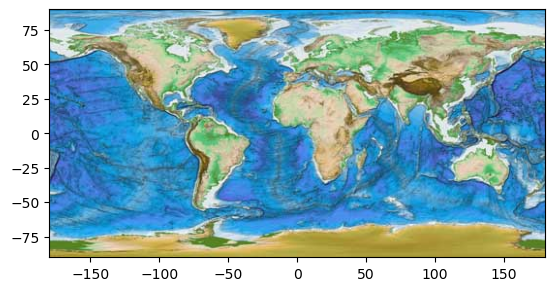

<Axes: >

In [13]:
%matplotlib inline
from rasterio import plot
plot.show(world)

对于多波段影像，我们也可以通过传入一个元组（栅格数据源，波段索引）来显示其中的**单个波段**：

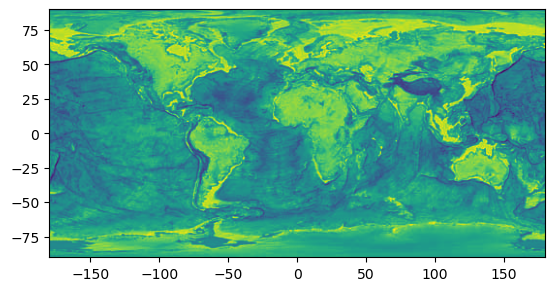

<Axes: >

In [14]:
plot.show((world, 2), cmap='viridis')

并排显示多个波段：

<Axes: title={'center': 'blue channel'}>

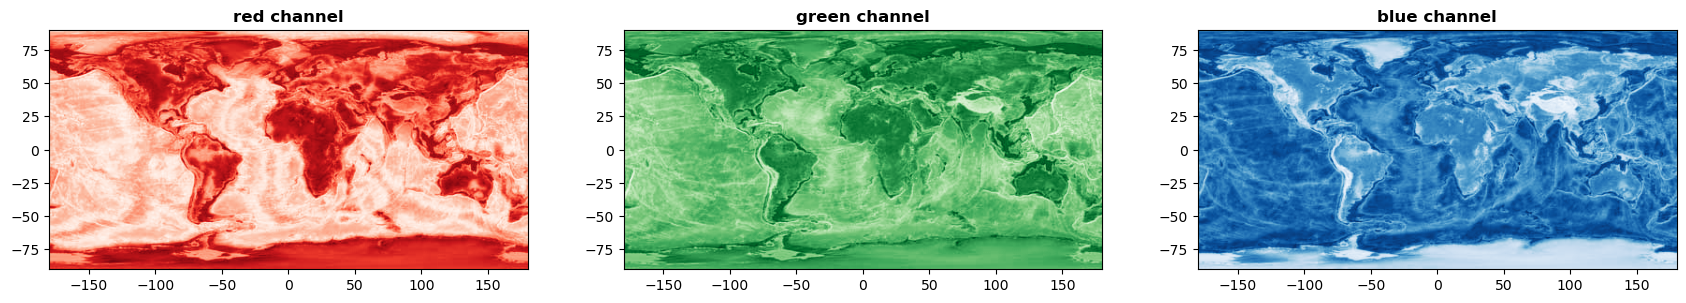

In [15]:
from matplotlib import pyplot as plt

fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
plot.show((world, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((world, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((world, 3), ax=axb, cmap='Blues', title='blue channel')

如果我们希望查看数据的直方图，可以使用 `plot.show_hist` 函数：

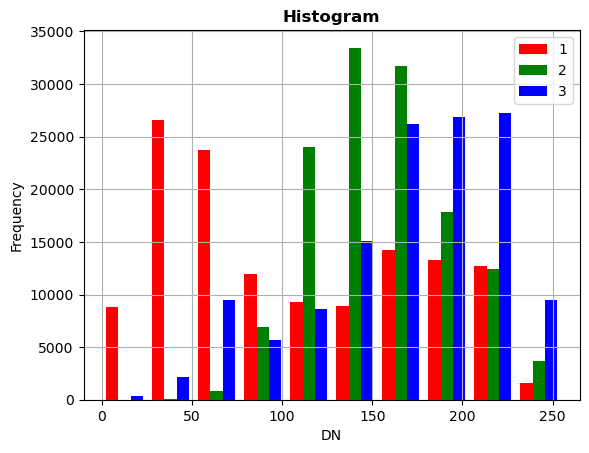

In [16]:
%matplotlib inline
plot.show_hist(world)

可以将 `pyplot` 中直方图的任意可选参数传递给 `show_hist`，以对显示效果进行调整：

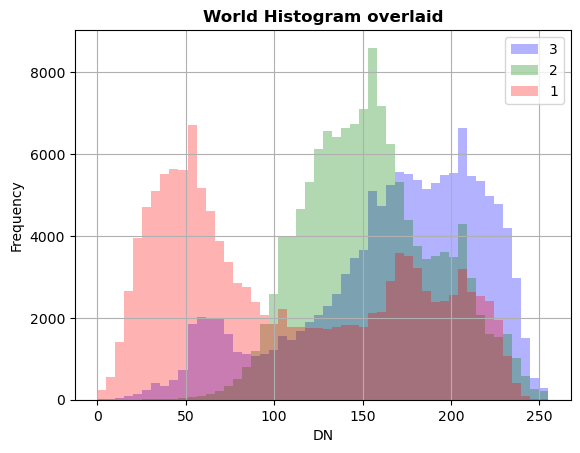

In [17]:
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title='World Histogram overlaid')

使用 `matplotlib` 从栅格数据中渲染等值线（contours）也是一件相对容易实现的事情：

<Axes: >

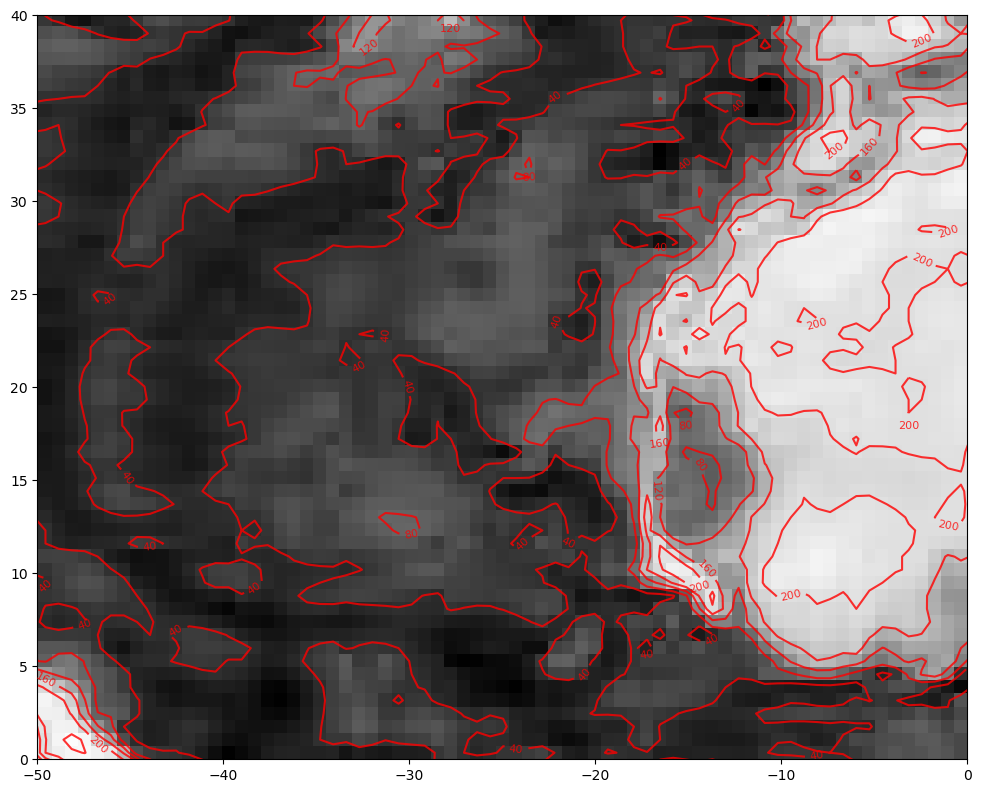

In [18]:
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)

plot.show((world, 1), contour=True, ax=ax)

## 创建新的栅格数据（Creating a new raster）

在进行栅格分析或处理时，RasterIO 提供了一种与 NumPy 之间**非常便捷的桥接方式**。在这个示例中，我们将基于一个已有的**数字高程模型（DEM）**计算生成一个新的栅格数据。第一步是打开该栅格文件：

In [19]:
srtm = rasterio.open('../data/srtm/srtm.geotiff')

`read` 方法用于**实际访问栅格中的数据**。它以波段编号作为参数，并返回一个 NumPy 的 [NDArray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) 对象：

In [20]:
import numpy as np
srtm_array = srtm.read(1)
srtm_array

array([[346, 347, 348, ..., 402, 403, 403],
       [345, 351, 357, ..., 399, 402, 402],
       [360, 367, 374, ..., 410, 414, 410],
       ...,
       [257, 256, 259, ..., 460, 456, 452],
       [277, 269, 265, ..., 453, 450, 449],
       [305, 308, 302, ..., 443, 441, 446]], shape=(152, 318), dtype=int16)

这是由 [Shuttle Radio Topography Mission](https://www2.jpl.nasa.gov/srtm/)（SRTM）生成的数字高程模型中的一个瓦片。现在我们已经获得了一个 NDArray，可以直接使用 [matplotlib](https://matplotlib.org/) 库来绘制其中的内容。需要注意的是，以这种方式绘制时，图像中**不包含任何地理位置信息**：

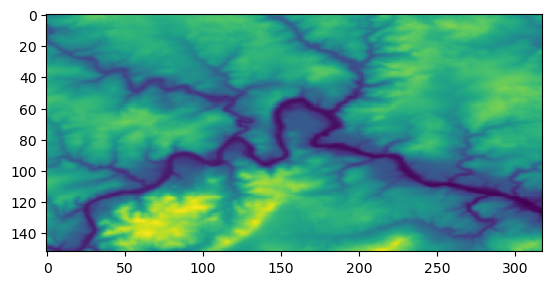

In [21]:
from matplotlib import pyplot
pyplot.imshow(srtm_array, cmap='viridis')
pyplot.show()

当一个栅格波段被封装为数组之后，地图代数（map algebra）以及一般性的栅格分析都会变得相当简单。作为示例，下面给出了一个由移动窗口（moving window）定义的**高通滤波器（high-pass filter）**：

![High-pass filter](./images/HighPassFilter.png)

这是数字图像处理中的一种典型操作，同时也常用于栅格分析。要将这种移动窗口应用到一个 NumPy 数组上，需要进行如下操作：

In [22]:
high_pass_array = np.full(srtm_array.shape, 0).astype(np.int16)

for i in range (1, srtm_array.shape[0] - 1):
    for j in range (1, srtm_array.shape[1] - 1):
        high_pass_array[i,j] = \
            srtm_array[i,j] * 4 - \
            srtm_array[i-1,j] - \
            srtm_array[i,j+1] - \
            srtm_array[i,j-1] - \
            srtm_array[i+1,j]
            
high_pass_array

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, -12,  -5, ..., -15, -10,   0],
       [  0,   3,  12, ...,   7,  15,   0],
       ...,
       [  0, -59, -52, ...,   9,   6,   0],
       [  0, -30, -24, ...,   4,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(152, 318), dtype=int16)

在保存结果之前，可以再次使用 `matplotlib` 来检查处理结果：

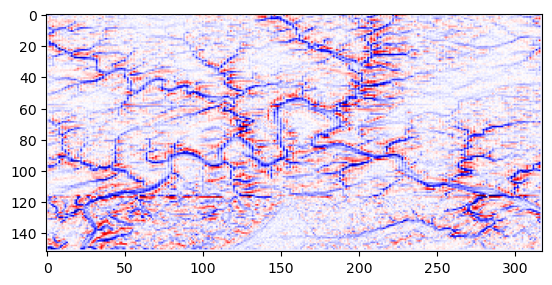

In [23]:
pyplot.imshow(high_pass_array, cmap='seismic')
pyplot.show()

高通滤波器会突出显示数值变化剧烈的区域（上方栅格中的蓝色和红色单元）。由于输入数据是 DEM，在这个例子中，高通滤波器显示的是**坡度最陡的单元格**。

此时，这个新的栅格结果仍然只是一个数组。为了将其保存（或在其他场景中使用）为一个**具有地理参考的信息对象**，需要创建一个新的 `Dataset` 对象。可以通过以写入模式调用 `open` 方法来实现，即使用参数 `'w'`：

In [24]:
high_pass = rasterio.open(
    '../data/srtm/srtm_high_pass.geotiff',
    'w',
    driver='GTiff',
    height=high_pass_array.shape[0],
    width=high_pass_array.shape[1],
    count=1,
    dtype=str(high_pass_array.dtype),
    crs=srtm.crs,
    transform=srtm.transform
)

在写入模式下，`open` 需要提供更多的信息。行数和列数，以及数据类型，都可以直接从数组对象本身获取。CRS 信息则来自原始的 `srtm` 对象。新栅格中只有单元格的内容发生了变化，其空间位置和单元格大小保持不变。

`open` 会创建一个到新栅格文件的连接，并返回一个 `RasterUpdater` 类型的对象。通过这个对象，可以将新数组的内容写入到文件中：

In [25]:
high_pass.write(high_pass_array, 1)

`write` 方法以 **NumPy 数组（包含单元格内容）** 和 **栅格中的波段编号** 作为参数。在这个例子中，由于只有一个波段，因此使用 `1` 作为波段编号。

为了将数据真正写入硬盘，需要调用 `close` 方法来刷新并关闭文件：

In [26]:
high_pass.close()

---
[<- 矢量数据（Vector Data）](04-vector-data.ipynb) | [Data analysis ->](06-data-analysis.ipynb)